# **CrypToth**

CrypToth needs to calculate DAIS and FF Score.

## **A. DAIS Part**

**\* This notebook assumes that DAIS has already been installed and set up.**

### **1.   Preparation for DAIS**



Before running DAIS, the molecular dynamics simulations to be compared must be completed.

Create a directory to be used for calculation, and save the structure that will become Contl. and the structure that will become Case(s) in the directory.

If you use Amber, run the following command to convert to PDB for DAIS.

In [ ]:
! mdcrd2pdb_for-TDA.bash

If Gromacs is used, after converting the trajectory to a single PDB, delete the first two structures where the initial and final structures are stored, then execute the following command to convert the PDB for DAIS.

In [ ]:
! PDB_for-TDA.bash

The following command can then be executed to create a directory structure in which DAIS calculations can be performed.

In [ ]:
! DAIS.bash

By executing these, the following directory structure is created.

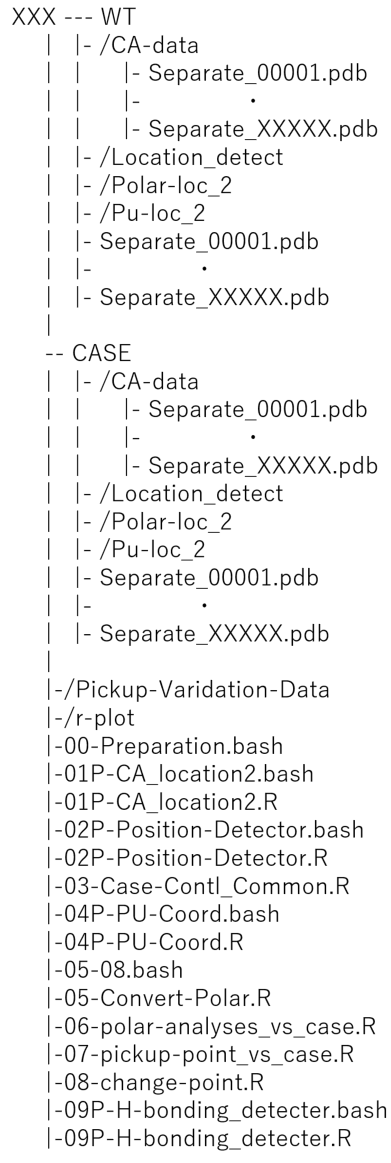

This completes the preparation.

### **2.   Perform DAIS calculations**

DAIS consists of multiple R scripts, but if setup is complete, the following commands can be used to perform all calculations.

In [ ]:
! AUTO-DAIS.bah

Those extracted by DAIS as meaningful structural variations are exported as PDFs in the directory Pickup-Variation-Data. Variation intensity (ID Score) is calculated from these plots with smoothed "**r**" variations of Case and Contl.

For example, consider the case where the following file is written out.


*   A00-008_vs_WT-018_4.403.pdf
*   A00-012_vs_WT-005_-8.333.pdf

In the first file, the 8th substructure of A00 corresponds to the 18th substructure of WT, meaning that the ID Score calculated from the two “r” variations is 4.403. In the same way, the next file means that the 12th substructure of A00 corresponds to the 5th substructure of WT, and the ID Score is -8.333.

## **B. Calculation of FF Scores Part**

## **1.   Preparation for FF Score calculations**

First, store the two R scripts one level above the target protein directory. Within the directory of each target protein, the directory of DAIS calculated using the results of MD, which was calculated five times using six probes, should be stored. In addition, amino acid information around the target protein Hotspot should also be registered in the "spots" directory.

The amino acid species and number should be written in the spot file as shown below.

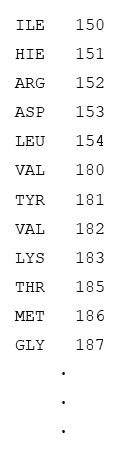

For example, if the target protein directory is 1FVR, the directory structure is as follows. The amino acid species and number should be written in the spot file as shown below.

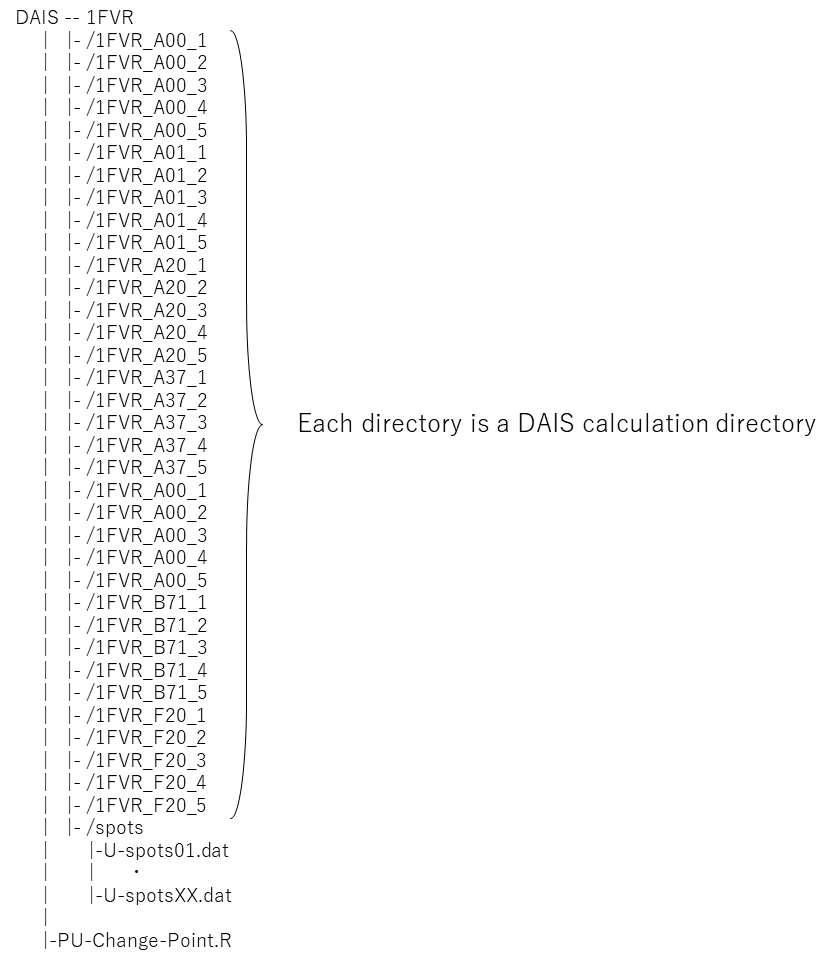

## **2.   FF Score calculations**

The following the R script can be used to calculate the FF Scores.

In [ ]:
! Rscript Estimate-Average-Scores.R

For each DAIS result, Spot_Scores.csv is written.
There are five Tot.Counts for each Probe molecule, and the average of the counts at each execution is taken, and then the mean and standard deviation of the five count means are calculated.

Then, the enforcement times that are more than a standard deviation away from the average of the mean values are excluded as outliers, and the final FF Score can be obtained by taking the average of the FF Score at each spot.